## UFRJ | Cálculo Numérico | 2021.2

### Tarefa 5 | Gabriele Jandres | 119159948

#### Discussões com: Carlos Bravo, Victor Cardoso

In [8]:
using LinearAlgebra
using Plots

### Exercício 1 | Experimento com temperatura

_________________________________________________________________________________________________________________________________________________________________________________________

Queremos utilizar o método de mínimos quadrados com coeficientes não lineares para determinar a curva da forma $T = c_0 x^{c_1}$ que melhor se ajusta aos dados da tabela. 

Pelo enunciado, temos que:

$$T(x) = c_0 x^{c_1}$$

onde

$T$ é a temperatura em graus Celsius

$x$ é a posição em centímetros

$c_0$ e $c_1$ são constantes

Aplicando $ln$ em ambos os lados para eliminar a exponencial:

$$
ln(T(x)) = ln(c_0x^{c_1}) \\
ln(T) = ln(c_0) + ln(x^{c_1}) \\
ln(T) = ln(c_0) + c_1*ln(x)
$$

Para utilizar a regressão com coeficientes lineares, vamos migrar para o "mundo barra", fazendo uma troca de variáveis:

$$
\overline{T} = ln(T)\\
\overline{x} = ln(x) \\
\overline{c_0} = ln(c_0) \\
\overline{c_1} = c_1 
$$

O que nos deixa com a seguinte equação no mundo barra:

$$\overline{T} = \overline{c_0} + \overline{c_1}\overline{x}$$

Vamos utilizar a função auxiliar para calcular a matriz de Vandermonde e outra função para realizar a regressão (utilizando MQ em seu interior):

In [1]:
# Função auxiliar para construir a matriz de Vandermonde

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# grau: grau que desejamos para ser uma das dimensões da matriz

function vandermonde(x, grau)
    n, = size(x) # quantidade de pontos
    V = zeros(n, grau + 1) # criamos uma matriz n X (grau + 1)
    
    # preenchemos a matriz criada
    for i = 1:n
        for j = 1:(grau + 1)
            V[i, j] = x[i] ^ (j - 1)
        end
    end
    
    return V
end

vandermonde (generic function with 1 method)

In [2]:
# Função para calcular a regressão polinomial

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y
# grau: o grau desejado para o polinômio calculado

function regressao(x, y, grau)
    V = vandermonde(x, grau) # construímos a matriz de Vandermonde
    c = V \ y # mínimos quadrados para obtenção dos coeficientes do polinômio, resolve o sistema Vc = y
    return c
end

regressao (generic function with 1 method)

Colocando nossas posições e temperaturas em arrays e fazendo a transição para o mundo barra, podemos criar a matriz de Vandermonde e realizar a regressão para descobrirmos os valores dos coeficientes no mundo linear:

In [3]:
# função original: T(x) = c0 * x^(c1) 
x = [0.1; 0.2; 0.4; 0.8; 0.9] # posições
T = [22; 43; 84; 210; 320] # temperaturas

# Dicionário (troca de variável) indo pro mundo barra
x_barra = log.(x)
T_barra = log.(T)

# Regressao no mundo barra para descobrirmos os valores dos coeficientes c0_barra e c1_barra
V = vandermonde(x_barra, 1)
c_barra = regressao(x_barra, T_barra, 1)

# O primeiro coeficiente é constante e o segundo é o coeficiente que acompanha x
c0_barra = c_barra[1]
c1_barra = c_barra[2]

print("c0_barra: ", c0_barra, "\n", "c1_barra: ", c1_barra)

c0_barra: 5.687764089882003
c1_barra: 1.1713294485597148

Agora precisamos voltar para as variáveis do "mundo original", para obtermos os valores de $c_0$ e $c_1$. Sabemos que $\overline{c_0} = ln(c_0)$ e $\overline{c_1} = c_1$, logo:

In [4]:
c0 = MathConstants.e^c0_barra # c0_barra = ln(c0) -> e^c0_barra = c0
c1 = c1_barra

print("c0: ", c0, "\n", "c1: ", c1)

c0: 295.232768178912
c1: 1.1713294485597148

Então, substituindo na nossa equação original $T(x) = c_0 x^{c_1}$, temos $T(x) = 295.232768178912 * x^{1.1713294485597148}$. 

Queremos usar isso que descobrirmos para calcular $T(0.3)$ com três casas decimais:

In [5]:
f(x) = c0 * x^c1 # definindo a função que representa T(x)
ceil(f(0.3), digits = 3) # calculando T(0.3) com três casas decimais arredondando para cima

72.062

Usando o modelo descobrimos que $T(0.3) \approx 72.062$.

### Exercício 2 | Ônibus espacial

_________________________________________________________________________________________________________________________________________________________________________________________

#### a. Integral numérica

Queremos estimar a altura atingida pelo ônibus $125s$ após o lançamento, para isso vamos fazer a integral numérica utilizando o metodo dos trapézios de $t = 0$ a $t = 125$. Pela tabela, temos os seguintes pontos de tempos e velocidades:

In [6]:
t = [0; 10; 15; 20; 32; 59; 62; 125] # tempos, em s
V = [0; 185; 319; 447; 742; 1325; 1445; 4151] # velocidades, em pé/s

8-element Vector{Int64}:
    0
  185
  319
  447
  742
 1325
 1445
 4151

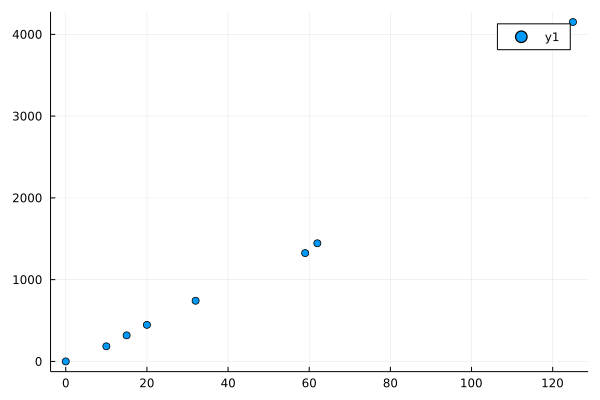

In [9]:
# Plotando os pontos para melhor visualização da situação
scatter(t, V)

Como temos $8$ pontos, formaremos sete trapézios a cada dois pontos adjacentes e em seguida somaremos suas áreas para obter a área total (integral). 

Por consequência, ao obtermos a integral obtemos o valor da altura atingida, já que estamos integrando a velocidade em função da posição.

Conforme visto em aula, utilizando o método dos trapézios, a área de um trapézio em particular vai ser dada por:

$$area_t = f(a)(b - a) + \frac{(b - a)(f(b) - f(a))}{2}$$

Então, para estimar a altura atingida por meio da integração numérica, realizaremos um laço para formarmos os sete trapézios usando dois pontos adjacentes e somaremos a área de cada um deles à área total:

In [10]:
integral = 0.0

for i = 1:7 
    integral += V[i] * (t[i + 1] - t[i]) + ((t[i + 1] - t[i]) * (V[i + 1] - V[i])) / 2 # área de um trapézio formado por dois pontos adjacentes
end

print(integral)

219567.5

Logo, podemos afirmar que o foguete atingiu $219567.5$ pés.

#### b. Erro máximo

Para estimar o erro máximo, além dos valores do início e fim do intervalo (a e b), precisamos do módulo do valor máximo da segunda derivada nesse mesmo intervalo, uma vez que a fórmula do erro máximo é dada por:

$$|erro| = \frac{M(b-a)^3}{12}$$

onde 

$M$ é o módulo do valor máximo da derivada no intervalo $[a, b]$

$a$ e $b$ são os extremos do intervalo

#### c. Reta que melhor descreve a distribuição dos pontos e estimativa da altura a partir dela

Queremos encontrar a reta, $p_1(x) = c0x + c1$, no sentido dos mínimos quadrados, que melhor descreve a distribuição dos pontos. Após encontrá-la, vamos também estimar a altura a partir dessa curva, ou seja, calcular a integral de $t = 0$ a $t = 125$.

Primeiramente, vamos realizar a regressão utilizando nossos pontos $t$ e $V$ para obtermos os coeficientes do polinômio de grau 1 (reta) que desejamos:

In [11]:
# regressão de grau 1
c = regressao(t, V, 1)

2-element Vector{Float64}:
 -232.97096383346036
   32.438909320952575

In [12]:
# polinômio de grau 1 que desejamos
p1(x) = c[2]x + c[1] 

p1 (generic function with 1 method)

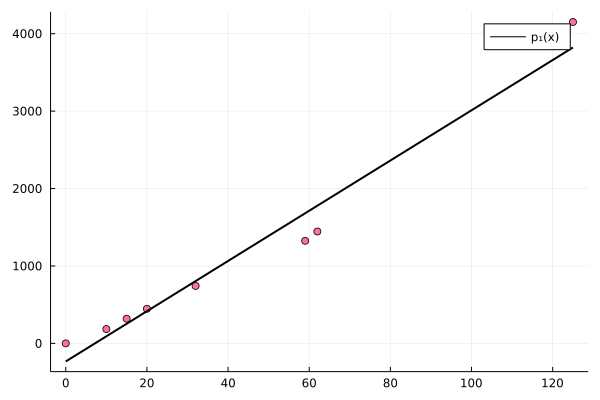

In [13]:
# Plota em um gráfico os pontos e a reta que os aproxima
scatter(t, V, label = false, c =:"#ff6f9c")
plot!(p1, c =:black, lw=2, label="p₁(x)")

Agora que encontramos a reta que aproxima esses pontos, vamos usar nossa função trapezio construída em aula para obter a área do trapézio formado no intervalo $[0, 125]$:

In [16]:
# Função para calcular a integral de f(x) de a até b utilizando o método dos trapézios

# -- Parâmetros --
# f: a função a ser integrada
# a: o ponto inicial do intervalo
# b: o ponto final do intervalo
# n: número de trapézios a serem construídos

function trapezio(f, a, b, n)
    h = (b - a) / n 
    
    S = 0.0 # somatorio das areas
    
    # calcula o "meio"
    for i = 1:(n - 1)  
        x = a + i * h
        S += 2 * f(x)
    end
    
    # calcula "as pontas"
    S = h / 2 * (S + f(a) + f(b)) 
    
    return S
end

trapezio (generic function with 1 method)

In [20]:
# obtemos uma aproximação para a integral utilizando um trapézio
trapezio(p1, 0, 125, 1)

224307.60859075945

Obtemos então que a área do trapézio, e por consequência a altura atingida, é de $224307.60859075945$ pés.

### Exercício 3 | Área do círculo

_________________________________________________________________________________________________________________________________________________________________________________________

#### a. Aproximação da área no primeiro quadrante

Queremos determinar uma aproximação para a área limitada pelo círculo no primeiro quadrante e depois usar esse valor para aproximar $\pi$. Para isso, vamos usar o método do trapézio com $h = 0.1$. 

Primeiramente, vamos definir uma função para a metade superior do círculo usando a fórmula da circunferência:

$$f(x) = \sqrt{1 - x^2}$$

pois sabemos que $x^2 + y^2 = 1$ no caso da circunferência trigonométrica

Para realizar a integral, devemos pegar valores de x que estejam apenas no primeiro quadrante, que é onde estamos interessados. Portanto, vamos integrar de 0 a 1.

Podemos utilizar novamente o método do trapézio, por meio da função trapézio:

In [5]:
# Função para calcular a integral de f(x) de a até b utilizando o método dos trapézios

# -- Parâmetros --
# f: a função a ser integrada
# a: o ponto inicial do intervalo
# b: o ponto final do intervalo
# n: número de trapézios a serem construídos

function trapezio(f, a, b, n)
    h = (b - a) / n 
    
    S = 0.0 # somatorio das areas
    
    # calcula o "meio"
    for i = 1:(n - 1)  
        x = a + i * h
        S += 2 * f(x)
    end
    
    # calcula "as pontas"
    S = h / 2 * (S + f(a) + f(b)) 
    
    return S
end

trapezio (generic function with 1 method)

In [22]:
f(x) = sqrt(1 - x^2) # metade superior do círculo trigonométrico
a = 0 # início do intervalo em x
b = 1 # término do intervalo em x

# passamos 10 aqui porque queremos que h = 0.1
integral = trapezio(f, a, b, 10)

0.7761295815620796

Obtemos então que a área limitada pelo primeiro quadrante é aproximadamente $0.7761295815620796$. Como $\pi$ corresponde à área do círculo todo, e a integral que obtemos é $1/4$ dela, precisamos multiplicar por 4 pra obter a aproximação de $\pi$ que desejamos:

In [23]:
pi = 4 * integral

3.1045183262483182

Obtemos que $\pi \approx 3.1045183262483182$.

#### b. Por que não podemos usar a fórmula do erro da regra da trapézio?

Sabemos que o erro para o método do trapézio é dado por:

$$|erro| = \frac{M(b-a)^3}{12}$$

onde 

$M$ é o módulo do valor máximo da derivada no intervalo $[a, b]$

$a$ e $b$ são os extremos do intervalo

Temos nossa função $f(x) = \sqrt{1 - x^2}$, cuja segunda derivada é:

$$f"(x) = -\dfrac{1}{\left(1-x^2\right)^\frac{3}{2}}$$

E $lim f"(x) \rightarrow \infty$ quando $x \rightarrow 1$, logo $$M = \max_{x\in [0,1]}{\left|f''(x)\right|} = \infty$$

Dessa forma, utilizar a fórmula do erro nos diria apenas que $|erro| \le \infty$, não sendo de fato uma informação útil para estimar o erro de precisão.

### (Bônus) Exercício 4 | Integral dupla

_________________________________________________________________________________________________________________________________________________________________________________________

Podemos adaptar a função de integral dupla da Aula 18 em Julia para aproximar uma integral dupla cujos limites de integração em x são funções de y da seguinte forma:

In [21]:
# Função para calcular a integral de f(x) de a até b

# -- Parâmetros --
# f: a função a ser integrada
# a: limite inferior de integração
# b: limite superior de integração
# n: o número de trapézios a ser construído

function Integral(f, a, b, n)
    return trapezio(f, a, b, n)
end

Integral (generic function with 2 methods)

In [27]:
# Função para calcular a integral dupla de f(x,y) de h(y) até g(y) em x e de a até b em y

# -- Parâmetros --
# f: a função a ser integrada
# a: limite inferior de integração de y
# b: limite superior de integração de y
# h: limite inferior de integração de x
# g: limite superior de integração de x

function Integral_Dupla_Funcoes(f, a, b, h, g)
    n = 1000 # fixamos o número de trapézios
    
    # integral em relação a x
    function func(y)
        return Integral(x -> f(x,y), h(y), g(y), n)
    end
    
    # integral em relação a y
    return Integral(func, a, b, n)
end

Integral_Dupla_Funcoes (generic function with 1 method)

Vamos utilizar essa função para calcular:
$$\int_4^5{\int_{y+1}^{y+2}{x^2 + y^2 dx}dy}$$

sabendo que o resultado real é aproximadamente $56.5$.

In [28]:
f(x, y) = x^2 + y^2
a = 4
b = 5
h(y) = y + 1
g(y) = y + 2
Integral_Dupla(f, a, b, h, g)

56.50000050000003

Utilizando nossa função obtemos que o valor da integral é aproximadamente $56.50000050000003$.